In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:

from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
# Convert the dataset to a NumPy array  
data = np.array(data)  

# Get the number of rows (m) and columns (n) in the dataset  
m, n = data.shape  

# Shuffle the dataset randomly to ensure unbiased training and validation sets  
np.random.shuffle(data)  

# Split the first 1000 samples for the development (dev) set  
data_dev = data[0:1000].T  # Transpose the data for easier indexing  
Y_dev = data_dev[0]  # Extract labels (first row)  
X_dev = data_dev[1:n]  # Extract features (remaining rows)  

# Normalize pixel values by scaling them to the range [0,1] (assuming image data)  
X_dev = X_dev / 255.  

# Use the remaining data as the training set  
data_train = data[1000:m].T  # Transpose for consistency  
Y_train = data_train[0]  # Extract labels (first row)  
X_train = data_train[1:n]  # Extract features (remaining rows)  

# Normalize training data  
X_train = X_train / 255.  

# Get the number of training samples  
_, m_train = X_train.shape  


In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 1 7 ... 7 7 7] [8 0 0 ... 9 4 3]
0.10414634146341463
Iteration:  10
[0 3 3 ... 0 9 3] [8 0 0 ... 9 4 3]
0.1674878048780488
Iteration:  20
[3 0 0 ... 0 9 3] [8 0 0 ... 9 4 3]
0.287390243902439
Iteration:  30
[3 0 0 ... 0 9 3] [8 0 0 ... 9 4 3]
0.35373170731707315
Iteration:  40
[3 0 0 ... 0 9 3] [8 0 0 ... 9 4 3]
0.409780487804878
Iteration:  50
[3 0 0 ... 0 9 3] [8 0 0 ... 9 4 3]
0.47309756097560973
Iteration:  60
[3 0 0 ... 9 4 8] [8 0 0 ... 9 4 3]
0.5324878048780488
Iteration:  70
[3 0 0 ... 9 4 3] [8 0 0 ... 9 4 3]
0.580390243902439
Iteration:  80
[3 0 0 ... 9 4 3] [8 0 0 ... 9 4 3]
0.6192926829268293
Iteration:  90
[3 0 0 ... 9 4 3] [8 0 0 ... 9 4 3]
0.6487804878048781
Iteration:  100
[3 0 0 ... 9 4 3] [8 0 0 ... 9 4 3]
0.6726341463414635
Iteration:  110
[3 0 0 ... 9 4 3] [8 0 0 ... 9 4 3]
0.6923414634146341
Iteration:  120
[3 0 0 ... 9 4 3] [8 0 0 ... 9 4 3]
0.7087317073170731
Iteration:  130
[3 0 0 ... 9 4 3] [8 0 0 ... 9 4 3]
0.7219756097560975
Iteration:  140
[

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


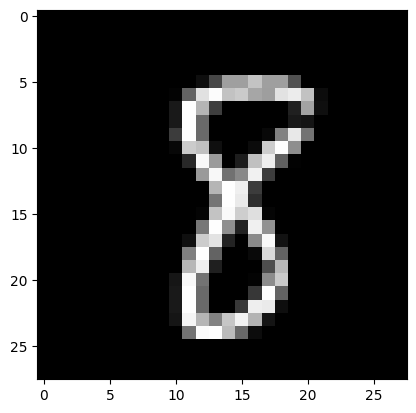

Prediction:  [0]
Label:  0


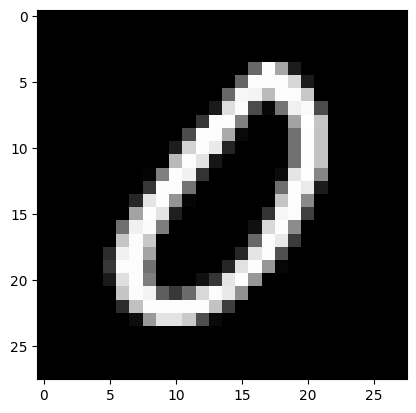

Prediction:  [0]
Label:  0


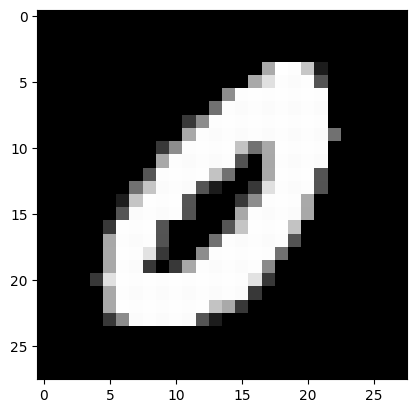

Prediction:  [8]
Label:  8


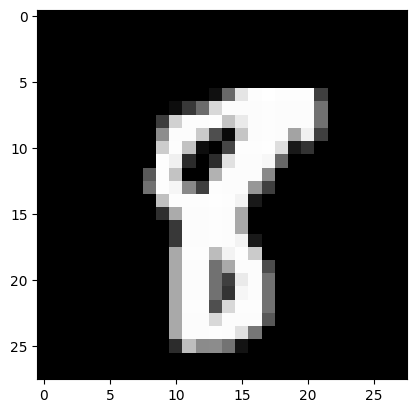

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 5 0 4 8 6 0 6 4 0 7 3 5 2 1 1 5 9 6 1 8 3 6 6 1 6 8 1 0 7 0 9 4 5 4 7 8
 9 4 1 2 0 1 1 2 0 2 8 3 0 6 5 0 4 2 8 1 1 9 0 3 5 1 2 7 7 0 0 5 0 9 9 4 6
 1 3 6 5 6 0 3 3 3 7 8 6 7 0 6 0 0 5 9 5 5 3 5 8 7 3 8 4 0 5 6 6 2 9 6 8 2
 6 8 2 1 4 3 5 2 5 6 6 7 8 1 1 7 9 5 7 1 0 1 6 1 1 9 7 9 3 1 7 0 2 2 8 1 1
 8 3 3 0 4 4 9 2 1 1 1 4 0 4 4 7 8 0 1 4 4 5 7 6 8 8 6 8 0 7 0 7 9 3 8 2 8
 2 7 8 7 0 8 6 1 4 2 6 6 4 4 2 3 4 4 7 3 1 8 0 6 6 3 8 2 6 2 8 2 1 8 1 6 2
 1 5 0 0 1 8 8 1 6 3 0 1 7 8 4 3 2 1 8 8 6 7 5 1 0 8 2 4 4 6 4 9 1 7 0 2 7
 0 8 6 4 3 8 7 7 3 5 2 8 2 7 5 4 2 0 7 1 0 2 0 1 4 5 0 6 0 3 5 3 5 5 5 1 7
 8 0 0 1 7 2 7 9 7 0 8 6 2 7 5 3 9 6 0 7 3 4 1 9 8 9 2 7 7 3 6 9 4 1 5 2 0
 1 2 9 9 9 4 4 3 7 9 4 7 2 3 6 3 4 9 1 4 6 5 9 4 4 3 0 4 3 4 1 4 8 0 8 6 9
 5 2 5 0 7 3 9 1 3 5 4 8 7 1 9 5 9 2 1 8 3 6 6 6 5 4 9 5 9 9 2 9 5 7 1 6 8
 2 6 4 0 0 8 9 7 3 3 2 2 7 9 0 9 5 8 8 7 9 2 3 8 0 0 6 1 0 9 6 8 6 6 8 0 3
 1 2 0 8 9 5 3 6 4 5 8 2 0 9 8 2 0 2 4 1 5 3 3 7 9 1 9 2 0 8 7 8 3 5 8 8 4
 3 8 3 9 3 5 9 1 5 8 2 0 

0.837